Matplotlib is building the font cache; this may take a moment.


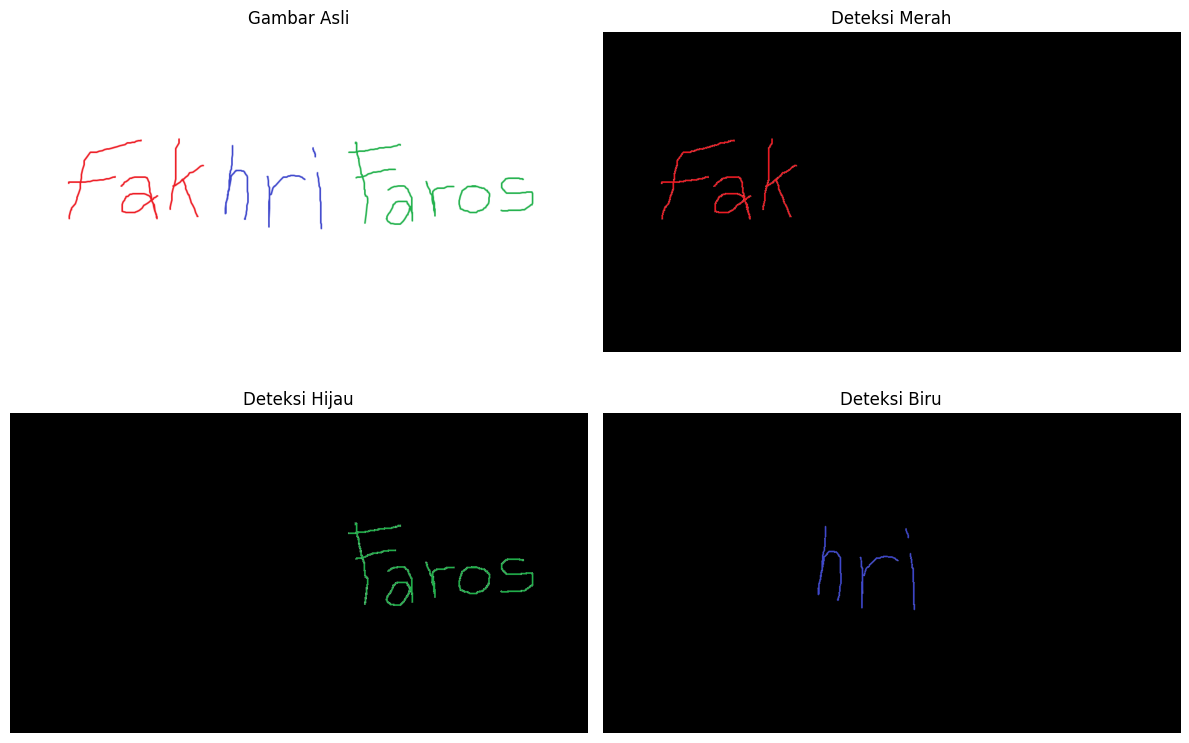

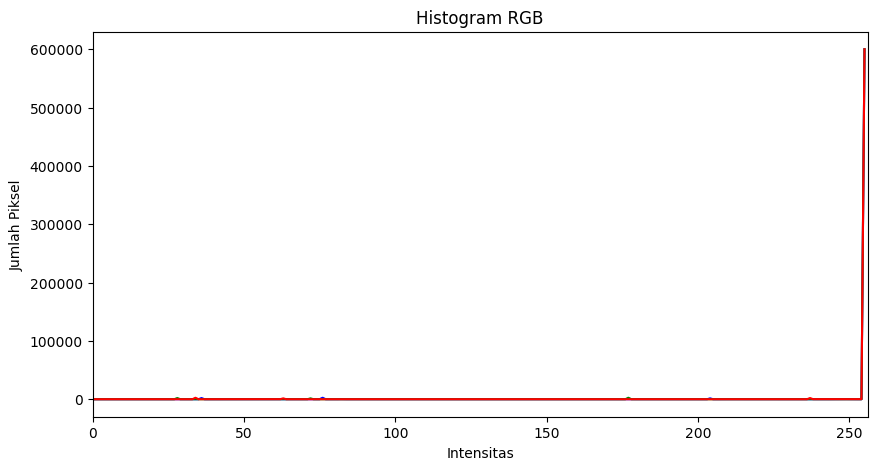

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Load Gambar --- 202331200_Fakhri Faros
img = cv2.imread('citra_nama.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# --- Konversi ke HSV --- 202331200_Fakhri Faros
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# --- Deteksi Warna --- 202331200_Fakhri Faros
# Rentang warna merah (dua rentang karena melintasi batas 180 derajat di HSV)
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Rentang warna hijau 202331200_Fakhri Faros
lower_green = np.array([40, 40, 40])
upper_green = np.array([80, 255, 255])

# Rentang warna biru 202331200_Fakhri Faros
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])

# Masking 202331200_Fakhri Faros
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

# Terapkan Mask 202331200_Fakhri Faros
res_red = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_red)
res_green = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_green)
res_blue = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_blue)

# --- Tampilkan Hasil Deteksi Warna --- 202331200_Fakhri Faros
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(res_red)
plt.title('Deteksi Merah')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(res_green)
plt.title('Deteksi Hijau')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(res_blue)
plt.title('Deteksi Biru')
plt.axis('off')

plt.tight_layout()
plt.show()

# --- Histogram RGB --- 202331200_Fakhri Faros
colors = ('b', 'g', 'r')
plt.figure(figsize=(10, 5))
for i, col in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])

plt.title('Histogram RGB')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Piksel')
plt.show()
